In [17]:
# Imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from PIL import Image
import seaborn as sns

In [2]:
# Dataset
DataSet = '/content/sample_data/mnist_test.csv'

# Read dataset to pandas dataframe.
dataset = pd.read_csv(DataSet, header=None)

# verify loaded dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 59.9 MB


In [3]:
print('Sample entries in dataset')
# first 5 entries
dataset.head(n=5)

Sample entries in dataset


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


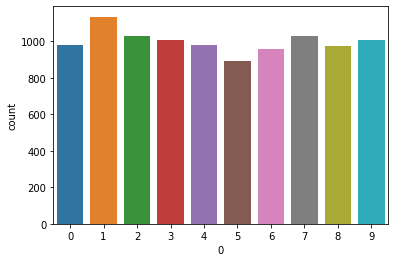

In [4]:
sns.countplot(dataset.iloc[:,0])
plt.show()

In [5]:
# Split data into Features, Labels

# first 4 columns correspond to features, 5th column contains the class labels
X = dataset.iloc[:,1:].values
Y = dataset.iloc[:, 0].values

In [6]:
# Train-Test split

# Following an 80-20 split on data.
# The dataset is shuffled with a the random seed for reproducible results.

X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle=True, random_state=10, test_size=0.20)

print("Number of train samples: ", len(X_train))
print("Number of test samples: ", len(X_test))

Number of train samples:  8000
Number of test samples:  2000


In [7]:
# Feature normalization

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Fit model to training data

# RBF
classifier = SVC(kernel='rbf',gamma='auto')
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [9]:
# Fit model to training data

# Polynomial
#classifier = SVC(kernel='poly')

# Linear
#classifier = SVC(kernel='linear')

#classifier.fit(X_train, y_train)

In [10]:
# Evaluate on test data 
y_pred = classifier.predict(X_test)

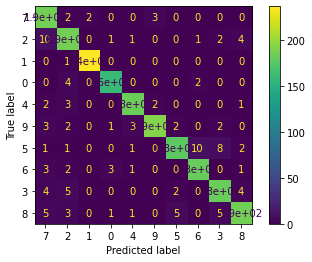

In [11]:
# Confusion Matrix
class_labels = dataset.iloc[:,0].unique()
cm = confusion_matrix(y_test, y_pred, labels=class_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot()

In [12]:
# Performance Statistics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       167
           1       0.99      1.00      0.99       238
           2       0.89      0.91      0.90       206
           3       0.92      0.92      0.92       198
           4       0.96      0.96      0.96       192
           5       0.95      0.89      0.92       200
           6       0.93      0.95      0.94       192
           7       0.87      0.96      0.91       194
           8       0.94      0.90      0.92       207
           9       0.97      0.94      0.96       206

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



In [13]:
df1 = []
for i in range(0,10,1):
  im = Image.open(r"/content/%d.png"%(i)) 
  newsize = (28, 28)
  im = im.resize(newsize)
  im.show() 
  width, height = im.size

  img = im.convert('L')

  img_arr = np.array(img)

  flat_img_arr = img_arr.flatten()

  img_list = flat_img_arr.tolist()

  img_list.insert(0, i)

  df1.append(img_list)

df = pd.DataFrame(df1)
print(df)
df.to_csv('smalltest.csv', header= None,  index=False)

   0    1    2    3    4    5    6    ...  778  779  780  781  782  783  784
0    0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
1    1    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
2    2    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
3    3    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
4    4    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
5    5    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
6    6    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
7    7    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
8    8    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
9    9    0    0    0    0    0    0  ...    0    0    0    0    0    0    0

[10 rows x 785 columns]


In [ ]:
SmallDataSet = '/content/smalltest.csv'

smalldataset = pd.read_csv(SmallDataSet, header=None)
smalldataset.info()

vertical_stack = pd.concat([dataset, smalldataset], axis=0)
vertical_stack.info()

X_smalltrain = vertical_stack.iloc[0:10000, 1:]
y_smalltrain = vertical_stack.iloc[0:10000, 0]
X_smalltest  = vertical_stack.iloc[10000:10011, 1:]
y_smalltest = vertical_stack.iloc[10000:10011, 0]

print("Number of train samples: ", len(X_smalltrain))
print("Number of test samples: ", len(X_smalltest))

scaler = StandardScaler()
scaler.fit(X_smalltrain)
X_smalltrain = scaler.transform(X_smalltrain)
X_smalltest = scaler.transform(X_smalltest)

C_range = 10. ** np.arange(-3, 8)
gamma_range = 10. ** np.arange(-5, 4)

param_grid = dict(gamma=gamma_range, C=C_range)

grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
#StratifiedKFold(y=y_smalltrain, k=5)

grid.fit(X_smalltrain, y_smalltrain)

print("The best classifier is: ", grid.best_estimator_)

y_smallpred = classifier.predict(X_smalltest)

class_labels = smalldataset.iloc[:,0].unique()
cm = confusion_matrix(y_smalltest, y_smallpred, labels=class_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot()
print(classification_report(y_smalltest, y_smallpred))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 61.5 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10010 entries, 0 to 9
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 60.0 MB
Number of train samples:  10000
Number of test samples:  10


In [ ]:
'''
SmallDataSet = '/content/smalltest.csv'

smalldataset = pd.read_csv(SmallDataSet, header=None)
smalldataset.info()

vertical_stack = pd.concat([dataset, smalldataset], axis=0)
vertical_stack.info()

X_smalltrain = vertical_stack.iloc[0:10000, 1:]
y_smalltrain = vertical_stack.iloc[0:10000, 0]
X_smalltest  = vertical_stack.iloc[10000:10011, 1:]
y_smalltest = vertical_stack.iloc[10000:10011, 0]

print("Number of train samples: ", len(X_smalltrain))
print("Number of test samples: ", len(X_smalltest))

scaler = StandardScaler()
scaler.fit(X_smalltrain)
X_smalltrain = scaler.transform(X_smalltrain)
X_smalltest = scaler.transform(X_smalltest)

classifier = SVC(C=0.01, kernel='rbf', gamma=10)
classifier.fit(X_smalltrain, y_smalltrain)

y_smallpred = classifier.predict(X_smalltest)

class_labels = smalldataset.iloc[:,0].unique()
cm = confusion_matrix(y_smalltest, y_smallpred, labels=class_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot()
print(classification_report(y_smalltest, y_smallpred))
'''